In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/padchestdataset/PADCHEST_chest_x_ray_images_labels_160K_01.02.19.csv


In [2]:
df = pd.read_csv("../input/padchestdataset/PADCHEST_chest_x_ray_images_labels_160K_01.02.19.csv")
pd.pandas.set_option("display.max_columns",False)
pd.pandas.set_option("display.max_rows",False)

/opt/conda/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3156: DtypeWarning: Columns (19,20) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
df.head()

,Unnamed: 0,ImageID,ImageDir,StudyDate_DICOM,StudyID,PatientID,PatientBirth,PatientSex_DICOM,ViewPosition_DICOM,Projection,MethodProjection,Pediatric,Modality_DICOM,Manufacturer_DICOM,PhotometricInterpretation_DICOM,PixelRepresentation_DICOM,PixelAspectRatio_DICOM,SpatialResolution_DICOM,BitsStored_DICOM,WindowCenter_DICOM,WindowWidth_DICOM,Rows_DICOM,Columns_DICOM,XRayTubeCurrent_DICOM,Exposure_DICOM,ExposureInuAs_DICOM,ExposureTime,RelativeXRayExposure_DICOM,ReportID,Report,MethodLabel,Labels,Localizations,LabelsLocalizationsBySentence,labelCUIS,LocalizationsCUIS
0,0,20536686640136348236148679891455886468_k6ga29.png,0,20140915,20536686640136348236148679891455886468,839860488694292331637988235681460987,1930.0,F,POSTEROANTERIOR,PA,Manual review of DICOM fields,No,CR,ImagingDynamicsCompanyLtd,MONOCHROME2,0,None,None,12,2092,2251,1728,1872,250,2,2500,10,-1.42,4765777,sin hallazg patolog edad pacient .,Physician,['normal'],[],"[['normal'], ['normal']]",[],[]
1,1,135803415504923515076821959678074435083_fzis7d...,0,20150914,135803415504923515076821959678074435083,313572750430997347502932654319389875966,1929.0,M,LATERAL,L,Manual review of DICOM fields,No,CR,ImagingDynamicsCompanyLtd,MONOCHROME2,0,None,None,12,2631,2065,3296,3236,400,10,10000,25,None,4991845,cambi pulmonar cronic sever . sign fibrosis b...,Physician,"['pulmonary fibrosis', 'chronic changes', 'kyp...","['loc basal', 'loc basal bilateral']","[['pulmonary fibrosis', 'loc basal bilateral']...",['C0034069' 'C0742362' 'C2115817' 'C3544344'],['C1282378']
2,2,135803415504923515076821959678074435083_fzis7b...,0,20150914,135803415504923515076821959678074435083,313572750430997347502932654319389875966,1929.0,M,POSTEROANTERIOR,PA,Manual review of DICOM fields,No,CR,ImagingDynamicsCompanyLtd,MONOCHROME2,0,None,None,12,2155,2880,3572,3732,320,3,3200,10,None,4991845,cambi pulmonar cronic sever . sign fibrosis b...,Physician,"['pulmonary fibrosis', 'chronic changes', 'kyp...","['loc basal', 'loc basal bilateral']","[['pulmonary fibrosis', 'loc basal bilateral']...",['C0034069' 'C0742362' 'C2115817' 'C3544344'],['C1282378']
3,3,113855343774216031107737439268243531979_3k951l...,0,20150717,113855343774216031107737439268243531979,50783093527901818115346441867348318648,1925.0,F,POSTEROANTERIOR,PA,Manual review of DICOM fields,No,CR,ImagingDynamicsCompanyLtd,MONOCHROME2,0,None,None,12,2472,2325,3584,3240,400,3,3200,8,None,4955977,. . siluet cardi mediastin dentr normal . cam...,Physician,['chronic changes'],"['loc cardiac', 'loc mediastinum', 'loc costop...","[['chronic changes'], ['chronic changes'], ['n...",['C0742362'],['C1522601' 'C0025066' 'C0230151']
4,4,113855343774216031107737439268243531979_3k951n...,0,20150717,113855343774216031107737439268243531979,50783093527901818115346441867348318648,1925.0,F,LATERAL,L,Manual review of DICOM fields,No,CR,ImagingDynamicsCompanyLtd,MONOCHROME2,0,None,None,12,2853,1871,3732,2908,320,6,6400,20,None,4955977,. . siluet cardi mediastin dentr normal . cam...,Physician,['chronic changes'],"['loc cardiac', 'loc mediastinum', 'loc costop...","[['chronic changes'], ['chronic changes'], ['n...",['C0742362'],['C1522601' 'C0025066' 'C0230151']


In [4]:
df

,Unnamed: 0,ImageID,ImageDir,StudyDate_DICOM,StudyID,PatientID,PatientBirth,PatientSex_DICOM,ViewPosition_DICOM,Projection,MethodProjection,Pediatric,Modality_DICOM,Manufacturer_DICOM,PhotometricInterpretation_DICOM,PixelRepresentation_DICOM,PixelAspectRatio_DICOM,SpatialResolution_DICOM,BitsStored_DICOM,WindowCenter_DICOM,WindowWidth_DICOM,Rows_DICOM,Columns_DICOM,XRayTubeCurrent_DICOM,Exposure_DICOM,ExposureInuAs_DICOM,ExposureTime,RelativeXRayExposure_DICOM,ReportID,Report,MethodLabel,Labels,Localizations,LabelsLocalizationsBySentence,labelCUIS,LocalizationsCUIS
0,0,20536686640136348236148679891455886468_k6ga29.png,0,20140915,20536686640136348236148679891455886468,839860488694292331637988235681460987,1930.0,F,POSTEROANTERIOR,PA,Manual review of DICOM fields,No,CR,ImagingDynamicsCompanyLtd,MONOCHROME2,0,None,None,12,2092,2251,1728,1872,250,2,2500,10,-1.42,4765777,sin hallazg patolog edad pacient .,Physician,['normal'],[],"[['normal'], ['normal']]",[],[]
1,1,135803415504923515076821959678074435083_fzis7d...,0,20150914,135803415504923515076821959678074435083,313572750430997347502932654319389875966,1929.0,M,LATERAL,L,Manual review of DICOM fields,No,CR,ImagingDynamicsCompanyLtd,MONOCHROME2,0,None,None,12,2631,2065,3296,3236,400,10,10000,25,None,4991845,cambi pulmonar cronic sever . sign fibrosis b...,Physician,"['pulmonary fibrosis', 'chronic changes', 'kyp...","['loc basal', 'loc basal bilateral']","[['pulmonary fibrosis', 'loc basal bilateral']...",['C0034069' 'C0742362' 'C2115817' 'C3544344'],['C1282378']
2,2,135803415504923515076821959678074435083_fzis7b...,0,20150914,135803415504923515076821959678074435083,313572750430997347502932654319389875966,1929.0,M,POSTEROANTERIOR,PA,Manual review of DICOM fields,No,CR,ImagingDynamicsCompanyLtd,MONOCHROME2,0,None,None,12,2155,2880,3572,3732,320,3,3200,10,None,4991845,cambi pulmonar cronic sever . sign fibrosis b...,Physician,"['pulmonary fibrosis', 'chronic changes', 'kyp...","['loc basal', 'loc basal bilateral']","[['pulmonary fibrosis', 'loc basal bilateral']...",['C0034069' 'C0742362' 'C2115817' 'C3544344'],['C1282378']
3,3,113855343774216031107737439268243531979_3k951l...,0,20150717,113855343774216031107737439268243531979,50783093527901818115346441867348318648,1925.0,F,POSTEROANTERIOR,PA,Manual review of DICOM fields,No,CR,ImagingDynamicsCompanyLtd,MONOCHROME2,0,None,None,12,2472,2325,3584,3240,400,3,3200,8,None,4955977,. . siluet cardi mediastin dentr normal . cam...,Physician,['chronic changes'],"['loc cardiac', 'loc mediastinum', 'loc costop...","[['chronic changes'], ['chronic changes'], ['n...",['C0742362'],['C1522601' 'C0025066' 'C0230151']
4,4,113855343774216031107737439268243531979_3k951n...,0,20150717,113855343774216031107737439268243531979,50783093527901818115346441867348318648,1925.0,F,LATERAL,L,Manual review of DICOM fields,No,CR,ImagingDynamicsCompanyLtd,MONOCHROME2,0,None,None,12,2853,1871,3732,2908,320,6,6400,20,None,4955977,. . siluet cardi mediastin dentr normal . cam...,Physician,['chronic changes'],"['loc cardiac', 'loc mediastinum', 'loc costop...","[['chronic changes'], ['chronic changes'], ['n...",['C0742362'],['C1522601' 'C0025066' 'C0230151']
5,5,313903302629300007485735352869488750471_75sg0k...,0,20170125,313903302629300007485735352869488750471,3707275269754751392247446521222810702,1978.0,M,NaN,AP,Manual review of DICOM fields,No,CR,PhilipsMedicalSystems,MONOCHROME2,0,"['1', '1']",0.2,12,2047.0,4095.0,1760,2140,None,None,None,None,1192,5310833,objet mejori radiolog con practic resolucion ...,Physician,"['unchanged', 'alveolar pattern', 'interstitia...","['loc basal', 'loc left']","[['unchanged'], ['alveolar pattern', 'intersti...",['C1332240' 'C2073538'],['C1282378' 'C0443246']
6,6,3137231742710829928-247610802266403640553_km0q...,0,20150804,3137231742710829928-247610802266403640553,93535126770783451980359712286922420997,1957.0,M,NaN,L,Manual review of DICOM fields,No,CR,PhilipsMedicalSystems,MONOCHROME2,0,"['1', '1']",0.143,12,2047.0,4095.0,2965,2976,0,0

In [5]:
labels = df.Labels

In [6]:
labels

0                                                ['normal']
1         ['pulmonary fibrosis', 'chronic changes', 'kyp...
2         ['pulmonary fibrosis', 'chronic changes', 'kyp...
3                                       ['chronic changes']
4                                       ['chronic changes']
5         ['unchanged', 'alveolar pattern', 'interstitia...
6         ['laminar atelectasis', 'pleural effusion', 'a...
7         ['laminar atelectasis', 'pleural effusion', 'a...
8                                             ['unchanged']
9         ['alveolar pattern', 'pleural effusion', 'endo...
10        ['pleural effusion', 'infiltrates', 'endotrach...
11        ['heart insufficiency', 'pleural effusion', 's...
                                ...                        
160849                                     ['cardiomegaly']
160850                                     ['cardiomegaly']
160851                                           ['normal']
160852                                  

In [7]:
labels.isnull().value_counts()

False    160758
True        103
Name: Labels, dtype: int64

In [8]:
labels.unique()

array(["['normal']",
       "['pulmonary fibrosis', 'chronic changes', 'kyphosis', 'pseudonodule', 'ground glass pattern']",
       "['chronic changes']", ...,
       "['central venous catheter', 'pleural effusion', 'infiltrates']",
       "['sternotomy', 'cardiomegaly', 'consolidation']",
       "['air trapping', ' flattened diaphragm', 'costophrenic angle blunting', 'aortic elongation', ' descendent aortic elongation']"],
      dtype=object)

In [15]:
top_list = labels.value_counts().nlargest(30)

In [16]:
top_list

['normal']                        50340
['COPD signs']                     5536
['unchanged']                      3584
['scoliosis']                      2542
['cardiomegaly']                   1587
['exclude']                        1284
['air trapping']                   1220
['aortic elongation']               973
['pleural effusion']                899
['nodule']                          791
['laminar atelectasis']             791
['pneumonia']                       783
                                  ...  
['calcified granuloma']             500
['callus rib fracture']             484
['vascular hilar enlargement']      481
['infiltrates', ' pneumonia']       478
['hemidiaphragm elevation']         430
['COPD signs', 'unchanged']         430
['bronchovascular markings']        424
['increased density']               395
['hiatal hernia']                   394
['apical pleural thickening']       393
['suboptimal study']                387
['kyphosis']                        357


<AxesSubplot:>

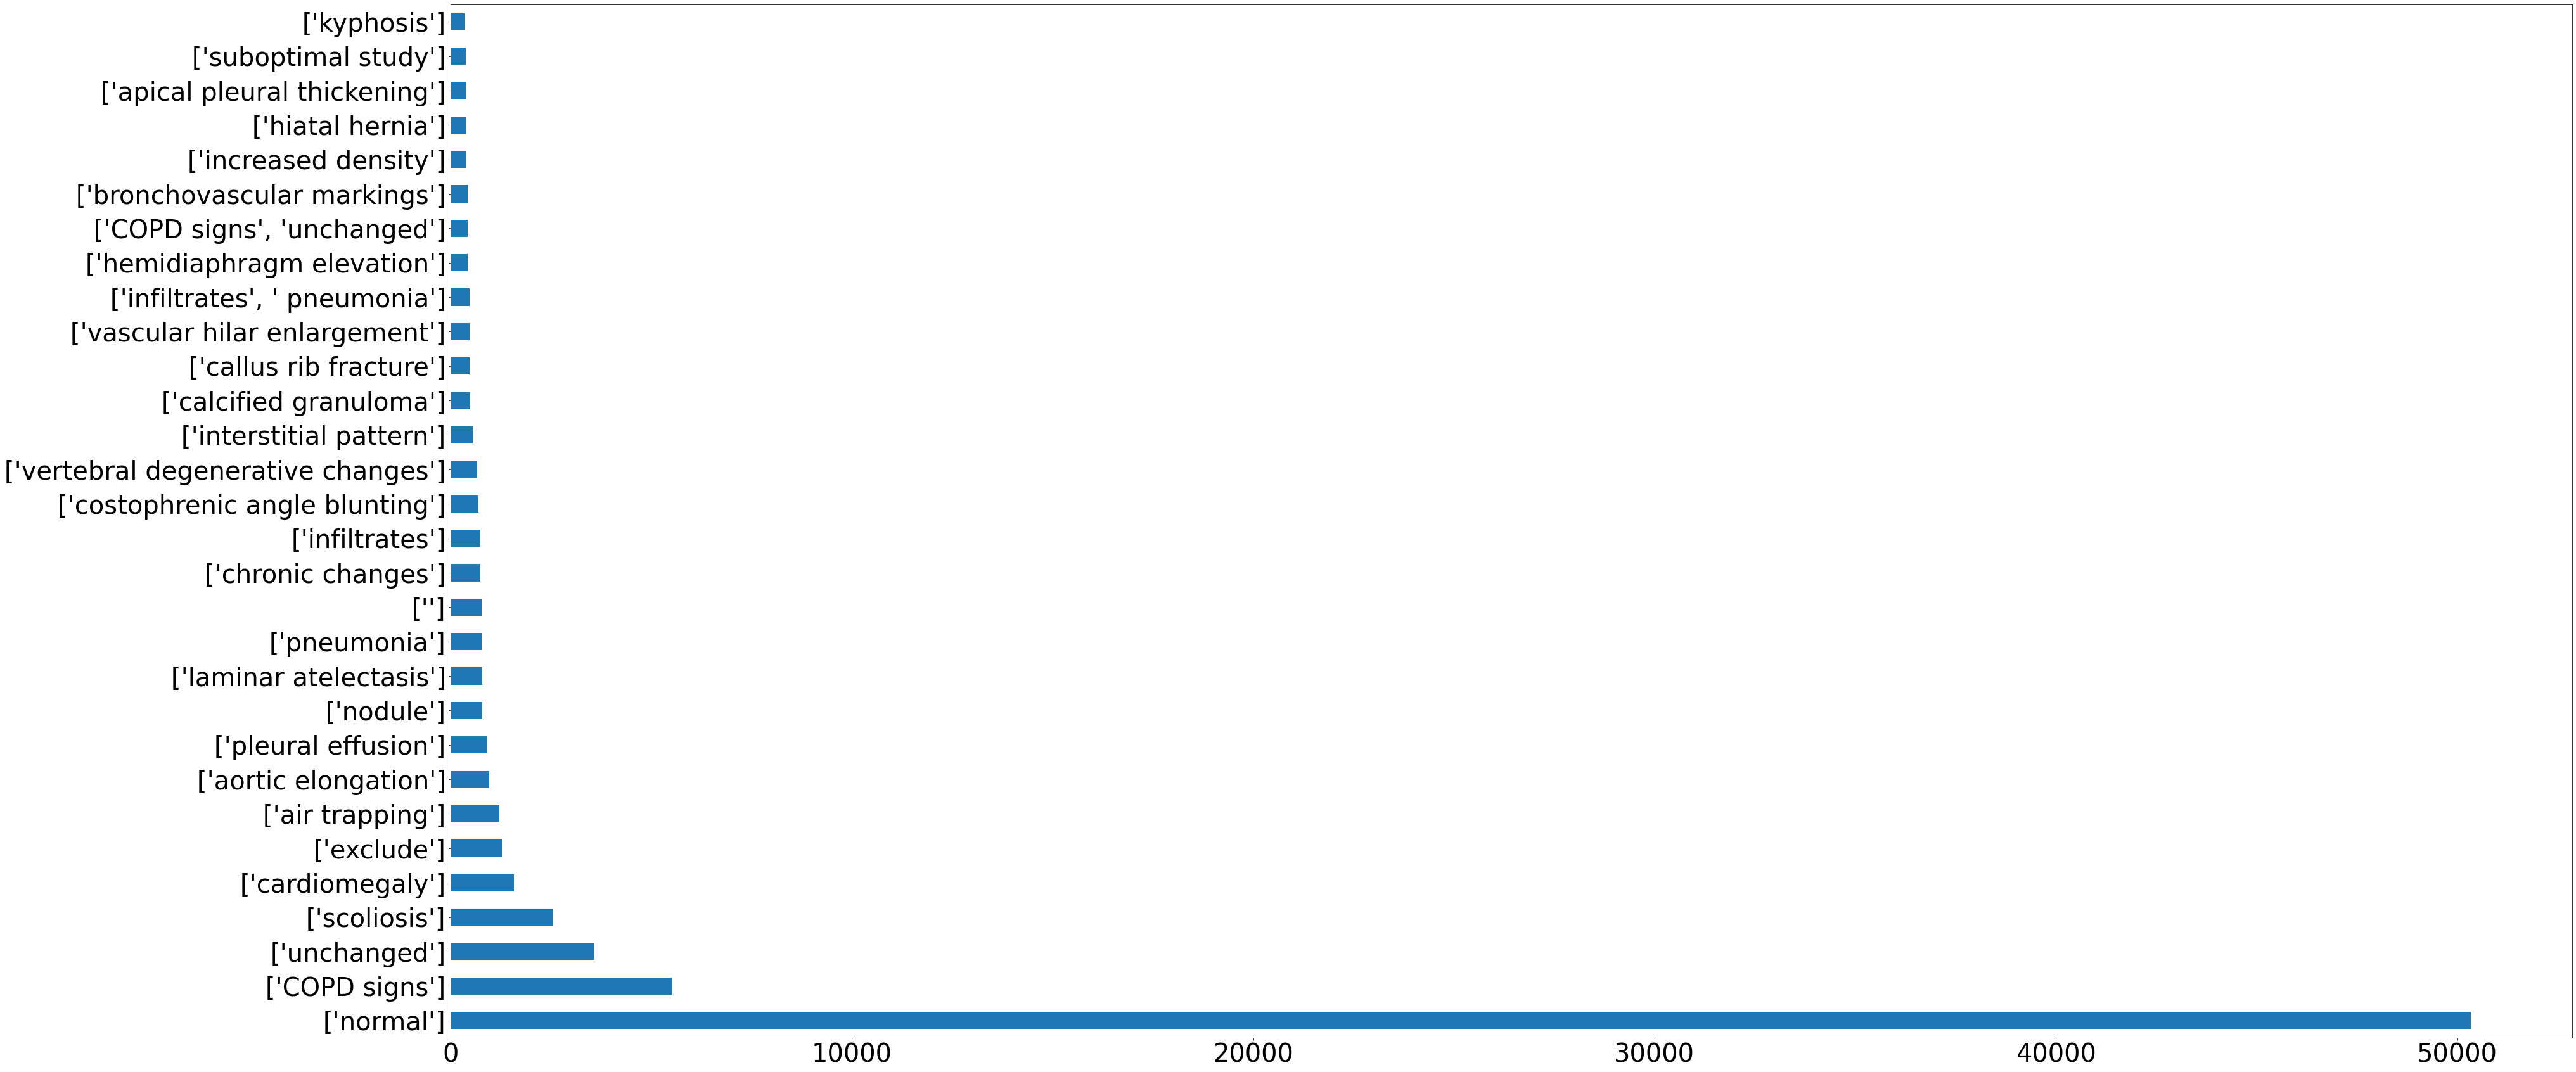

In [17]:
import matplotlib.pyplot as plt 
%matplotlib inline
plt.figure(figsize = (60,30))
plt.yticks(size = 40)
plt.xticks(size=40)
top_list.plot(kind="barh")

In [12]:
unique = set(labels)
len(unique)

28809

<AxesSubplot:>

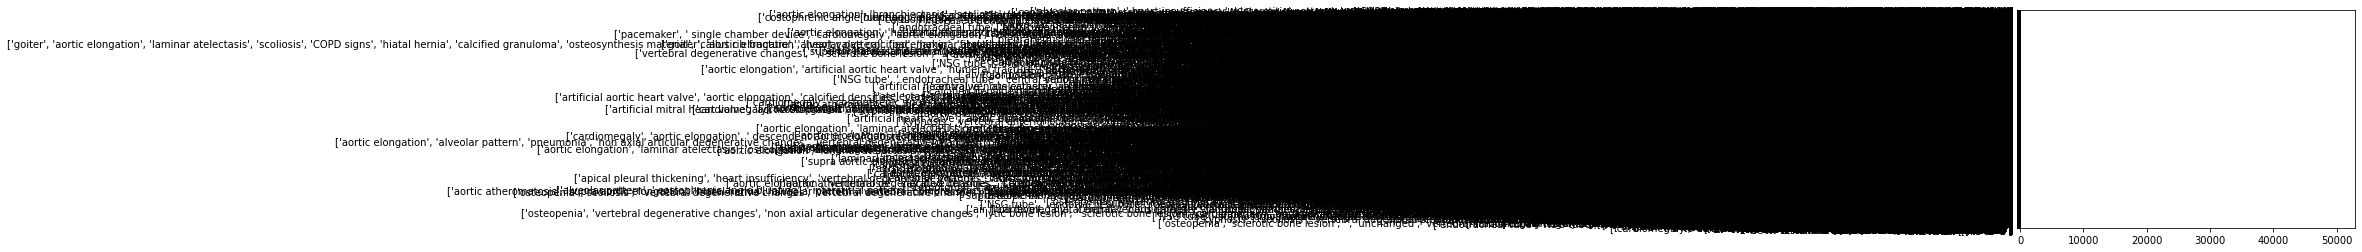

In [13]:


labels.value_counts().plot(kind="barh")

In [14]:
df.columns

Index(['Unnamed: 0', 'ImageID', 'ImageDir', 'StudyDate_DICOM', 'StudyID',
       'PatientID', 'PatientBirth', 'PatientSex_DICOM', 'ViewPosition_DICOM',
       'Projection', 'MethodProjection', 'Pediatric', 'Modality_DICOM',
       'Manufacturer_DICOM', 'PhotometricInterpretation_DICOM',
       'PixelRepresentation_DICOM', 'PixelAspectRatio_DICOM',
       'SpatialResolution_DICOM', 'BitsStored_DICOM', 'WindowCenter_DICOM',
       'WindowWidth_DICOM', 'Rows_DICOM', 'Columns_DICOM',
       'XRayTubeCurrent_DICOM', 'Exposure_DICOM', 'ExposureInuAs_DICOM',
       'ExposureTime', 'RelativeXRayExposure_DICOM', 'ReportID', 'Report',
       'MethodLabel', 'Labels', 'Localizations',
       'LabelsLocalizationsBySentence', 'labelCUIS', 'LocalizationsCUIS'],
      dtype='object')